In [2]:
import pandas as pd

url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [4]:
# 1 - Realizar a média da metragem para cada um dos bairros. 
media_por_bairro = dados.groupby('Bairro')['Metragem'].mean()
media_por_bairro

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

In [5]:
# 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas).

dados_bairro_especifico1 = dados.loc[dados['Bairro'] == 'Vila Mariana']
dados_bairro_especifico1



,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [6]:
# 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas).

dados_bairro_especifico2 = dados.query('Bairro == "Alto de Pinheiros"')
dados_bairro_especifico2

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
83,"Rua Carlos Rath, 103",Alto de Pinheiros,São Paulo,400,5,4,4,R$ 2.900.000
84,NaN,Alto de Pinheiros,São Paulo,358,4,4,4,R$ 3.500.000
137,"Rua Aquiramun, 94",Alto de Pinheiros,São Paulo,450,5,6,5,R$ 5.500.000
214,"Rua Açaré, 63",Alto de Pinheiros,São Paulo,252,3,5,4,R$ 2.900.000
226,Rua Banibás,Alto de Pinheiros,São Paulo,297,4,5,4,R$ 15.500\n /Mês
...,...,...,...,...,...,...,...,...
9691,NaN,Alto de Pinheiros,São Paulo,466,7,6,7,R$ 2.650.000
9696,Rua Sebastião Rodrigues,Alto de Pinheiros,São Paulo,150,3,2,2,R$ 2.150.000
9727,NaN,Alto de Pinheiros,São Paulo,466,7,6,7,R$ 2.650.000
9732,Rua Sebastião Rodrigues,Alto de Pinheiros,São Paulo,150,3,2,2,R$ 2.150.000


<Axes: xlabel='Bairro'>

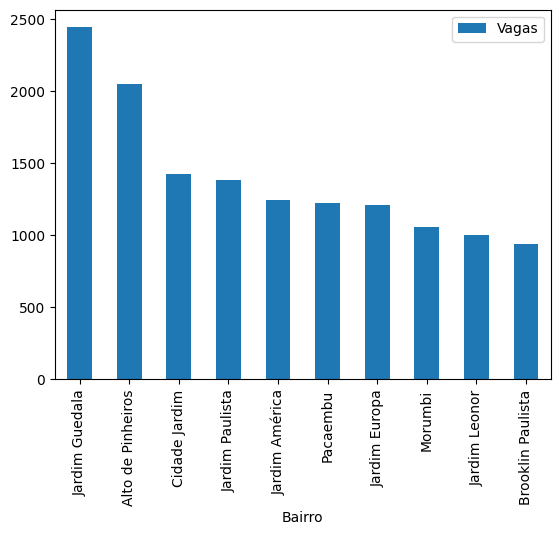

In [7]:
# 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF,
#  assim como tentar colocar alguma conclusão.
n_vagas_bairro = dados.groupby('Bairro')['Vagas'].sum().reset_index()

dados_ordenados = n_vagas_bairro.sort_values(by='Vagas', ascending=False)
top10_n_vagas_bairro = dados_ordenados.head(10)
top10_n_vagas_bairro.plot(x='Bairro', y='Vagas', kind='bar')
# A soma do numero de Vagas mostrado por bairro demonstra uma tendência dos moradores possuirem carro, 
# o que induz concluir que se tratam moradores com poder aquisitivo maior. Uma pesquisa mais aprofundada
# seria analisar a média de vagas por imóvel em cada bairro, o que poderia concluir que cada moradia possui ou não
# mais de um veículo na garagem.

C:\Users\ls_fo\AppData\Local\Temp\ipykernel_13116\3021139280.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  media_vagas_bairro.ordenados = media_vagas_bairro.sort_values(by='Vagas', ascending=False)


<Axes: xlabel='Bairro'>

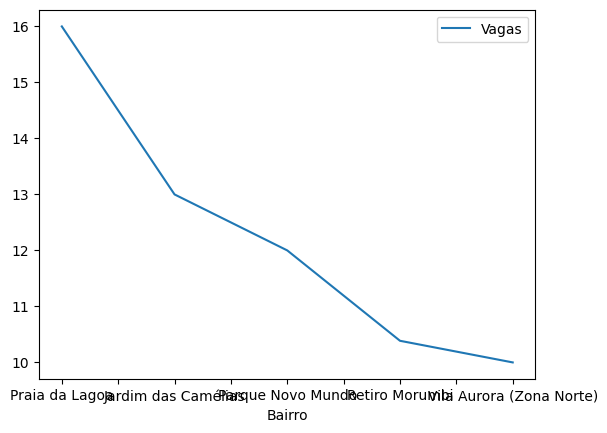

In [8]:
# 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF,
#  assim como tentar colocar alguma conclusão.
media_vagas_bairro = dados.groupby('Bairro')['Vagas'].mean().reset_index()
media_vagas_bairro.ordenados = media_vagas_bairro.sort_values(by='Vagas', ascending=False)
media_vagas_bairro.ordenados.head(5).plot(x='Bairro', y='Vagas', kind='line')
# O gráfico abaixo mostra que os 5 bairros com maior média de vagas possuem mais de 10 vagas por garagem.
# Estes dados são insuficientes para tirar grandes conclusões já que parecem se tratar de valores dispersos

In [9]:
# 4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max)
mediana_metragem = dados['Metragem'].median()
mediana_metragem


290.0

In [10]:
# 4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max)
maximo_metragem = dados['Metragem'].max()
maximo_metragem

750000

In [11]:
minimo_metragem = dados['Metragem'].min()
minimo_metragem

10

In [12]:
# 5 - Descobrir quais são os bairros que não tem nome de rua.
dados.head()
bairros_sem_rua = dados[dados['Rua'].isnull()]
bairros_sem_rua

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000


In [13]:
d1 = dados['Valor'].str.split(expand = True)[1]
d1

0        7.000.000
1        3.700.000
2          380.000
3          685.000
4          540.000
           ...    
10003      665.000
10004    2.300.000
10005    1.050.000
10006        2.200
10007      270.000
Name: 1, Length: 10008, dtype: object

In [14]:
len(dados['Valor'].str.split(expand = True)[1].unique())


1038

In [15]:
dados['Valor'].str.split(expand = True)[2].unique()


array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [16]:
# Criando 3 novas colunas com valor do imovel, moeda e Tipo_valor(diz se o preço é de venda ou aluguel)
dados[['Moeda','Preço', 'Tipo_valor']] = dados['Valor'].str.split(expand=True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preço,Tipo_valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [17]:
# COnfirmando se a coluna TIpo_valor só tem valores nulos que significa que o valor é de venda
dados[dados['Tipo_valor'].isnull()]['Tipo_valor'].unique()

array([None], dtype=object)

In [18]:
# Criando nova planilha com valores separados
dados_venda = dados[dados['Tipo_valor'].isnull()]
dados_venda.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preço,Tipo_valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [19]:
# converter o valor de string para Float
dados_venda['Preço'].str.replace('.','').astype(float)
dados_venda['Preço'] = dados_venda['Preço'].str.replace('.','').astype(float)
dados_venda.head()

C:\Users\ls_fo\AppData\Local\Temp\ipykernel_13116\2379121776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_venda['Preço'] = dados_venda['Preço'].str.replace('.','').astype(float)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preço,Tipo_valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,None


In [20]:
dados_venda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rua         6107 non-null   object 
 1   Bairro      9146 non-null   object 
 2   Cidade      9156 non-null   object 
 3   Metragem    9156 non-null   int64  
 4   Quartos     9156 non-null   int64  
 5   Banheiros   9156 non-null   int64  
 6   Vagas       9156 non-null   int64  
 7   Valor       9156 non-null   object 
 8   Moeda       9156 non-null   object 
 9   Preço       9156 non-null   float64
 10  Tipo_valor  0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


In [21]:
dados_venda.describe(include='all')


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preço,Tipo_valor
count,6107,9146,9156,9156.000000,9156.000000,9156.000000,9156.000000,9156,9156,9.156000e+03,0
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,NaN,0
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,NaN,NaN
mean,NaN,NaN,NaN,434.416230,3.446811,3.797073,3.960135,NaN,NaN,3.052203e+06,NaN
std,NaN,NaN,NaN,7856.422978,1.048944,1.967873,2.601022,NaN,NaN,3.944208e+06,NaN
min,NaN,NaN,NaN,10.000000,1.000000,1.000000,1.000000,NaN,NaN,1.300000e+04,NaN
25%,NaN,NaN,NaN,168.000000,3.000000,2.000000,2.000000,NaN,NaN,8.900000e+05,NaN
50%,NaN,NaN,NaN,276.000000,3.000000,4.000000,4.000000,NaN,NaN,1.800000e+06,NaN
75%,NaN,NaN,NaN,450.000000,4.000000,5.000000,5.000000,NaN,NaN,3.500000e+06,NaN


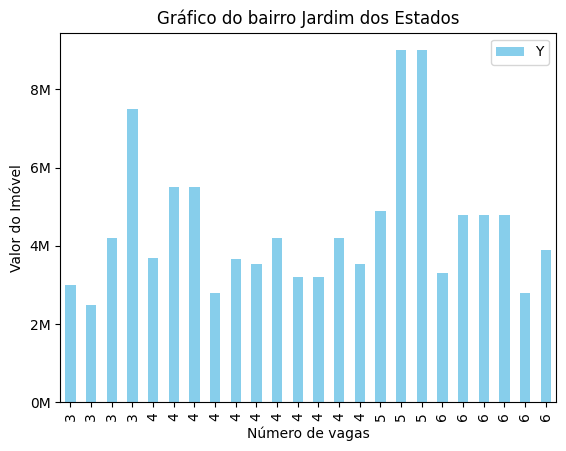

In [22]:
# Criar uma escala de valores em milhões.
# Deixar o gráfico de valores legível (alterar labels, cores, título, escala).

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

dados_Jardim_dos_estados = dados_venda.query('Bairro == "Jardim dos Estados"')
metragem_preco= {'X':dados_Jardim_dos_estados['Vagas'],'Y':dados_Jardim_dos_estados['Preço']}
grafico_metragem_preço = pd.DataFrame(metragem_preco)
grafico_metragem_preço = grafico_metragem_preço.sort_values(by='X', ascending=True)


def milhoes_formato(x, pos):
    return f'{x / 1000000:.0f}M'

grafico_metragem_preço.set_index('X').plot(kind='bar', stacked=True, color='skyblue')

plt.gca().yaxis.set_major_formatter(FuncFormatter(milhoes_formato))
plt.xlabel('Número de vagas')
plt.ylabel('Valor do Imóvel')
plt.title('Gráfico do bairro Jardim dos Estados')
plt.show()

# Não é possível identificar nenhuma correlação entre o aumento do numero de vagas e os valores do imóveis para 
# o bairro de Jardim dos Estados

In [23]:
# Preço do metro quadrado por bairro e plotar em um gráfico ideal.

dados_venda['preco_por_m2'] = dados_venda['Preço'] / dados['Metragem']
dados_venda['preco_por_m2']

C:\Users\ls_fo\AppData\Local\Temp\ipykernel_13116\1527365624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_venda['preco_por_m2'] = dados_venda['Preço'] / dados['Metragem']


0        7000.000000
1        7459.677419
2        3040.000000
3        2209.677419
4        5400.000000
            ...     
10002    5617.977528
10003    7000.000000
10004    3801.652893
10005    5121.951220
10007    2213.114754
Name: preco_por_m2, Length: 9156, dtype: float64

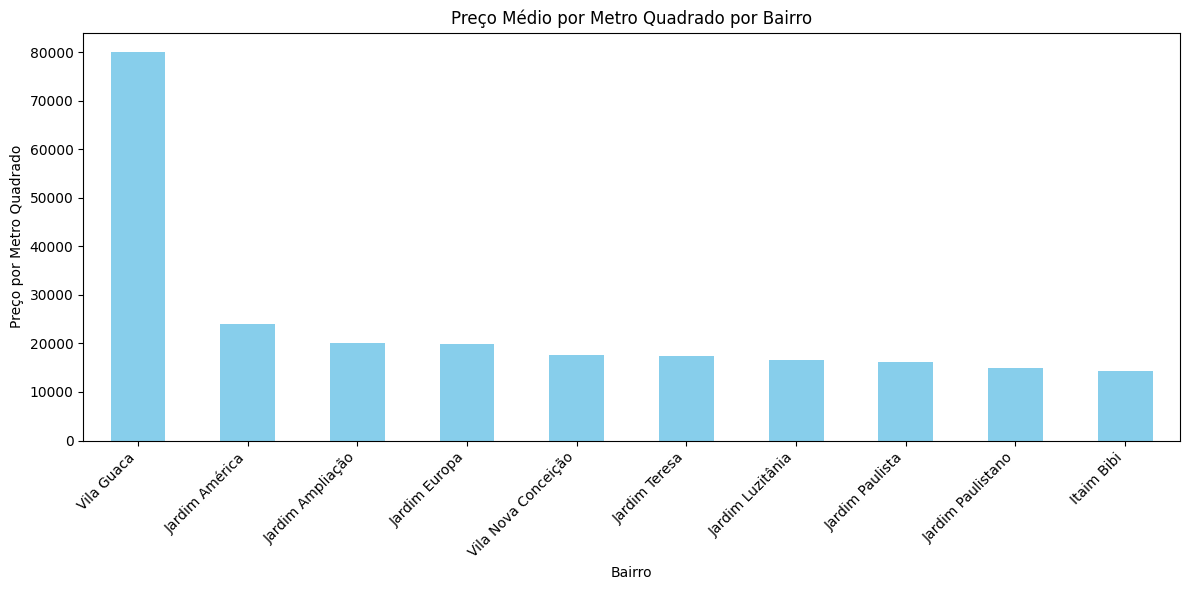

In [30]:
# Aula 2
# Preço do metro quadrado por bairro e plotar em um gráfico ideal.
media_por_bairro = dados_venda.groupby('Bairro')['preco_por_m2'].mean().sort_values(ascending=False)

top_10_bairros = media_por_bairro.head(10) #Plotar apenas os 10 primeiros valores em X

plt.figure(figsize=(12, 6))
top_10_bairros.plot(kind='bar', color='skyblue')
plt.xlabel('Bairro')
plt.ylabel('Preço por Metro Quadrado')
plt.title('Preço Médio por Metro Quadrado por Bairro')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor legibilidade

# Exibindo o gráfico
plt.tight_layout() #ajusta automaticamente a disposição dos subplots para garantir que não haja sobreposição de elementos
plt.show()

C:\Users\ls_fo\AppData\Local\Temp\ipykernel_13116\2902361381.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bairro', y='preco_por_m2', data=dados_top_10, order=dados_top_10.groupby('Bairro')['preco_por_m2'].median().sort_values(ascending=False).index, palette='viridis')


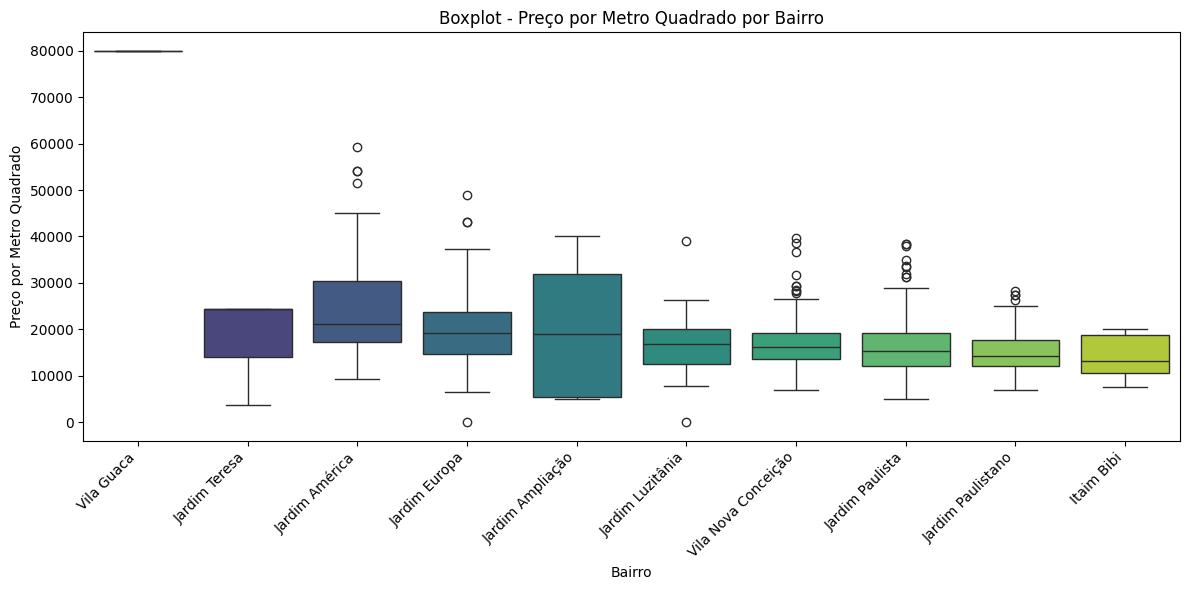

In [26]:
import seaborn as sns

# Selecionando apenas os 10 primeiros bairros
top_10_bairros = dados_venda.groupby('Bairro')['preco_por_m2'].median().sort_values(ascending=False).head(10)
dados_top_10 = dados_venda[dados_venda['Bairro'].isin(top_10_bairros.index)]

plt.figure(figsize=(12, 6))
# O parâmetro order é usado para ordenar os bairros com base na mediana do preço por metro quadrado em ordem decrescente
sns.boxplot(x='Bairro', y='preco_por_m2', data=dados_top_10, order=dados_top_10.groupby('Bairro')['preco_por_m2'].median().sort_values(ascending=False).index, palette='viridis')
plt.xlabel('Bairro')
plt.ylabel('Preço por Metro Quadrado')
plt.title('Boxplot - Preço por Metro Quadrado por Bairro')

# Ajustando a rotação dos rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico
plt.tight_layout()
plt.show()